# Third assignment
The assignment provides problems regarding basic applications of linear algebra and machine learning. Use this notebook to perform the computations and insert your comments into it. All the coding must be done in Python 3. 

The assignment has to be submitted individually!

All your plots have to be labelled properly!  (Non-labeled plots will result in point deductions!)

**Non running cells/tasks will not be considered!**

The tasks/questions are 1.1), 1.2), 1.3), 1.4) 2.1), 2.2), 2.3), 2.4)*, 3.1.1), 3.1.2), 3.1.3), 3.2.1), 3.2.2), 3.2.3), 3.2.4), 3.3.1)*, 3.3.2)* and 3.4)*. After each task description there is an answer cell for your code or text. For coding tasks they look like this:

```
# YOUR CODE HERE
```
(You can delete the "YOUR CODE HERE" comment, if you like.)

For markdown (text) cells the response cell will include this:

**WRITE YOUR ANSWER HERE**

Sometimes they are followed by test cells. You can run the test cells after you finished the task. If these cells don't show any errors, your answer is right. You can't/shouldn't edit test cells!

After you finished the notebook you can hit the "Validate" button on the top of the notebook to see if all test are good. You can also use the "Validate" button on the "Assignment" tap on the main page of python.ldv.ei.tum.de. Some tasks will be graded manually (e.g. plots, text answers). They don't have a following test cell. 

Please make sure to hit the "Submit" button on the "Assignment" tab on the main page of python.ldv.ei.tum.de before the deadline passes. You will get your final score after the deadline.

**Some tips:**
- Only change cells with `# YOUR CODE HERE` or **WRITE YOUR ANSWER HERE**
- Do not change cell types or the notebook name.
- Do not add other .ipynb files into the ami22 folder or subfolders.
- Do not override the original files in the ami22 folder or subfolders.
- For every plot makes sure that axes are correctly labeled with original labels and not encoded ones. 
- If you are asked to provide multiple plots, make sure that the titles are clear. A plot should be self explanatory, we should not have to look at your code to know what is plotted. 

#### Date of submission: May 22th, 2022, 23:55 hrs

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

2023-05-22 21:25:36.285210: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Task 1 - Preprocessing Images
Talking about Neural Networks and Deep Learning you will for sure stumble across the problem of networks requiring specific shapes for their image inputs. In this task we will have a look at the different approaches and how they affect the images.

In this part of the notebook we will work with a pre-trained model. Due to storage and compute capabilites we will not use famous networks like ResNet50, but the light-weight MobileNetV2.

### Task 1.1

Write a function `resize_to_224by224()` to change the shape of an image (represented as a tensorflow-tensor). The *MobileNetV2* requires input images with a size of $224 \times 224$. Since not all images are square, there are several ways to resize a generally rectangular image to a square format. 
Implement the following methods:
1. *Simple resize*, ignoring the aspect ratio: `mode='resize'`
2. *Zero-padding*, maintaining the aspect ratio by zero padding: `mode='pad'` 
3. *Resize and central crop*, resizing maintaining the aspect ratio followed by cropping an square part of a non-square resized image: `mode='crop'`

*Hint: You might use tensorflow functions.*

[<img src="resize_demo.png" width="700"/>](resize_demo.png)

In [2]:
def resize_to_224by224(im_tf: tf.Tensor, mode: str) -> tf.Tensor:
    # YOUR CODE HERE
    new_size = np.array([224, 224])
    
    if mode == 'resize':
        im_tf = tf.image.resize(im_tf, new_size)
    elif mode == 'pad':
        im_tf = tf.image.resize_with_pad(im_tf, 224, 224)
    elif mode == 'crop':
        im_tf = tf.image.resize_with_crop_or_pad(im_tf, 224, 224)
        im_tf = tf.cast(im_tf, tf.float32)
    return im_tf

### Task 1.2

Set up a `MobileNetV2()`-Keras model and assign it to the variable `mnv2`, pre-trained on the *ImageNet* dataset. 

In [3]:
# YOUR CODE HERE
mnv2 = MobileNetV2(weights = 'imagenet')

2023-05-22 21:25:38.769786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Task 1.3

Use the function `jpg_file_to_mobilenet()` (making use of your resize function from task 1.1) to load the provided images of a seakrait by inputing the filename and the resize mode. The function additionally uses the `preprocess_input()` method to further prepare the images for the network.
Predict the output for each image and append the result to the list `preds`. Compute the top-3 softmax-output values and the 3 associated classes using Keras' applications `decode_predictions()` function. Append the output of the function to the list `outs`.

In [4]:
def jpg_file_to_mobilenet(filename: str = None, show: bool = True, mode: str = 'resize') -> tf.Tensor:
    im_pil = Image.open(filename)
    im_tf = img_to_array(im_pil).astype('uint8')  
    im_tf = tf.convert_to_tensor(im_tf)
    
    im_tf_resized = resize_to_224by224(im_tf, mode)
    
    im_tf_mnet = preprocess_input(im_tf_resized)

    if show:
        f,a = plt.subplots(1, 3, figsize=(10, 5))
        f.suptitle(f"{filename} - {mode}", y=.85)
        
        a[0].imshow(im_tf)
        a[0].set_title('Original')

        a[1].imshow(im_tf_resized/255)
        a[1].set_title('Resized')
        
        a[2].imshow(im_tf_mnet*0.5 + 0.5)
        a[2].set_title('MobileNetPreprocessing')
        
        f.tight_layout()
        
    im_tf = im_tf_mnet[None, ...]
    
    return im_tf

1/1 [==============================] - 0s 36ms/step
[[('n01751748', 'sea_snake', 0.95866126), ('n01740131', 'night_snake', 0.0042017465), ('n01734418', 'king_snake', 0.0018715471)]]
[[('n01751748', 'sea_snake', 0.93218356), ('n01740131', 'night_snake', 0.008983438), ('n01734418', 'king_snake', 0.001787515)]]
[[('n01751748', 'sea_snake', 0.91269964), ('n01740131', 'night_snake', 0.015104391), ('n01734418', 'king_snake', 0.00820442)]]
[[('n01751748', 'sea_snake', 0.59237957), ('n01734418', 'king_snake', 0.26769224), ('n01740131', 'night_snake', 0.045145676)]]
[[('n02219486', 'ant', 0.43364602), ('n01742172', 'boa_constrictor', 0.08631762), ('n01770393', 'scorpion', 0.06281956)]]
[[('n01734418', 'king_snake', 0.4550483), ('n01751748', 'sea_snake', 0.19777228), ('n01740131', 'night_snake', 0.068637446)]]
[[('n01751748', 'sea_snake', 0.48617408), ('n01734418', 'king_snake', 0.29629457), ('n01740131', 'night_snake', 0.03938543)]]
[[('n01751748', 'sea_snake', 0.9083681), ('n01740131', 'night_

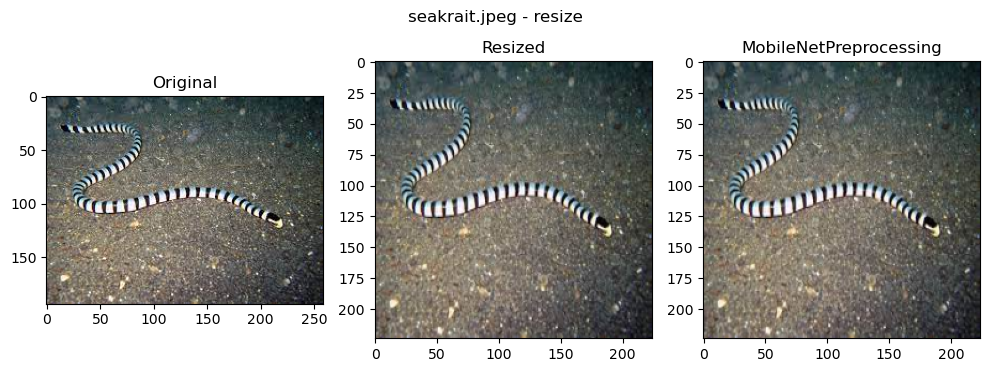

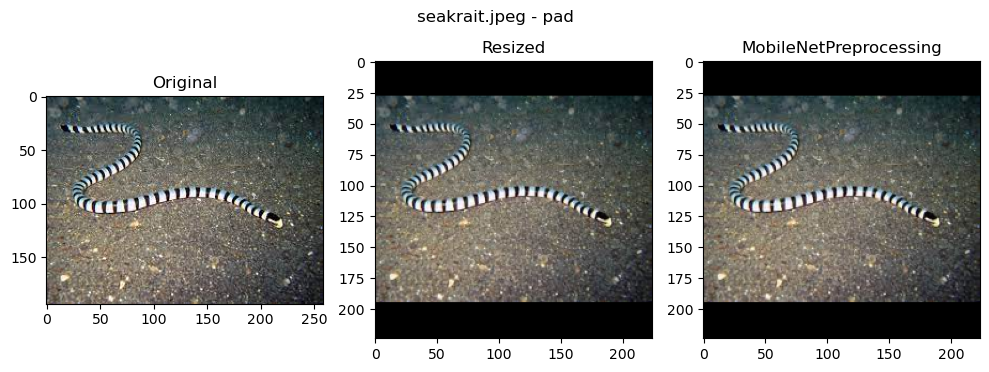

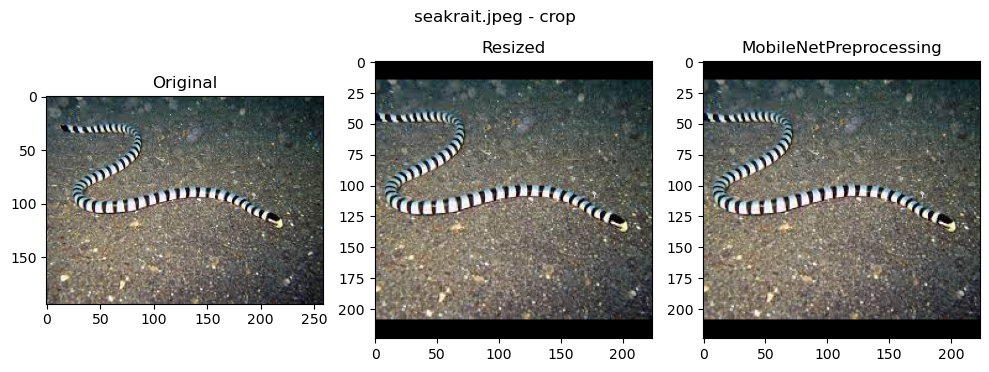

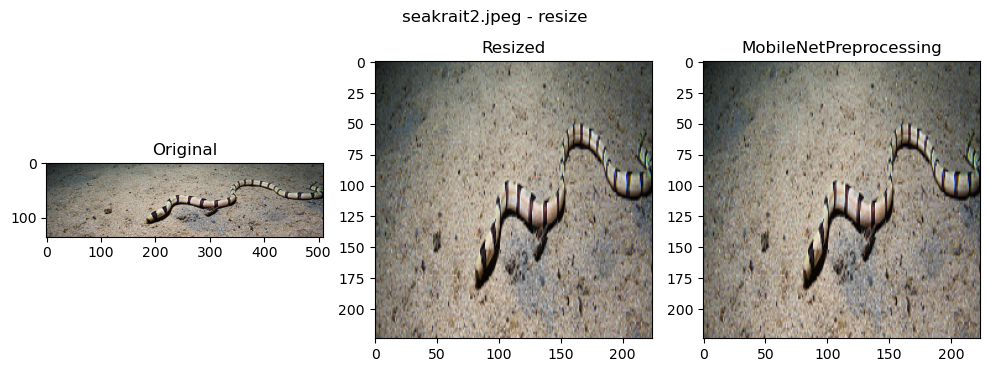

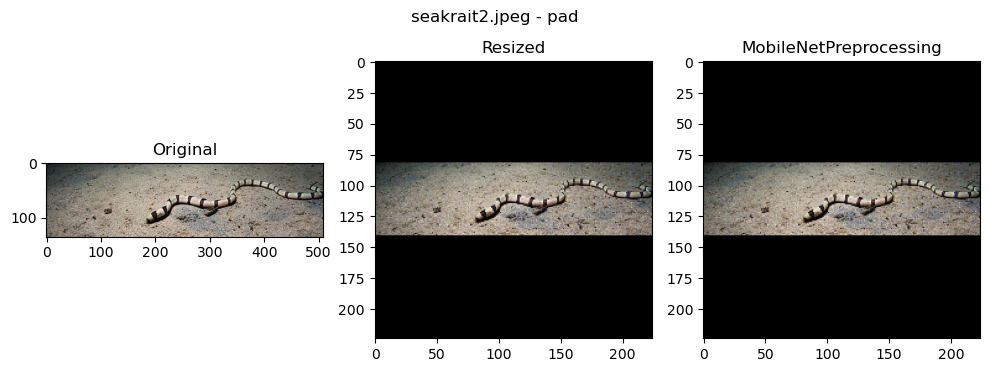

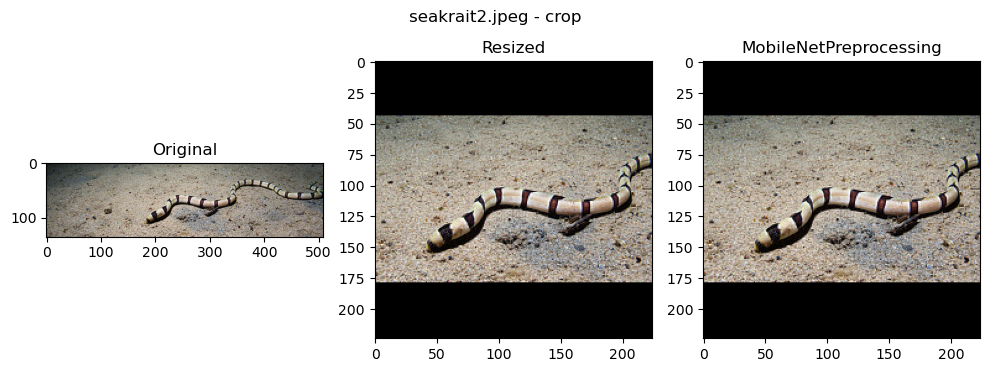

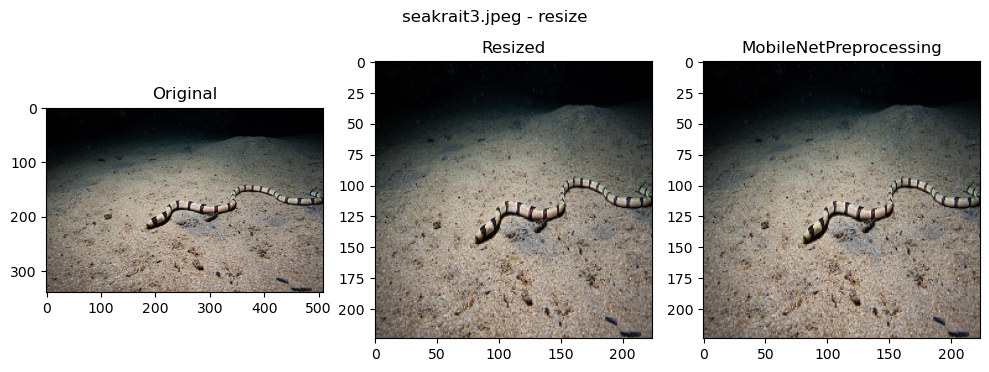

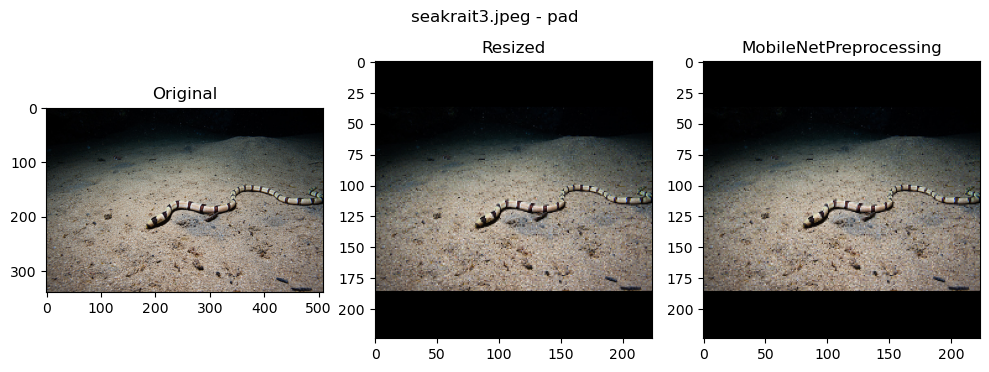

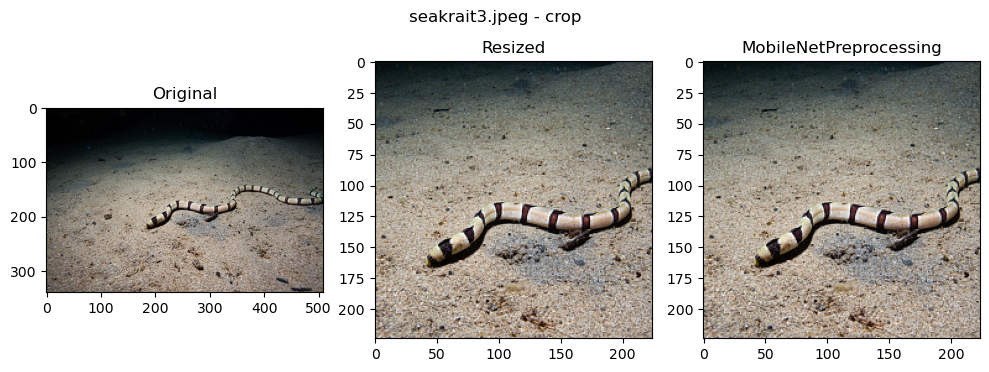

In [5]:
filenames = ['seakrait.jpeg', 'seakrait2.jpeg', 'seakrait3.jpeg']
modes = ['resize', 'pad', 'crop']

preds = list()
outs = list()

for filename in filenames:
    for mode in modes:
        # YOUR CODE HERE
        im_tf = jpg_file_to_mobilenet(filename = filename, mode = mode)
        pred = mnv2.predict(im_tf)
        preds.append(pred)
        outs.append(decode_predictions(pred, top=3))        

print(*outs, sep='\n')

### Task 1.4

The black areas due to the zero padding can have an influence on the prediction. 
Which of the following padding methods might provide a more natural looking solution?

'a': reflect: use the pixel intensities of the vector mirrored on the first and last values of the vector along each axis.
    
'b': median: use the median pixel intensities for padded pixels.
    
'c': edge/repeat: use the pixel intensities of the edge pixels for padded pixels.
        
'd': random: use uniformly distributed random values for the padded pixels.

*Use a variable* `x14` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x14='e'`. *There is only one correct answer.*

In [6]:
# YOUR CODE HERE
x14='a'
print('The answer is ' + x14 + '.')

The answer is a.


## Task 2 - Perturbations
After having a glimpse on how resizing can affect the performance, we will now check out how slight perturbations can harm the accuracy.

### Task 2.1

Using the code snippet below, load the three different images of a trike using the function `jpg_file_to_mobilenet()` with `mode='resize'`. Call the predict method of the pre-trained MobileNet Model `mnv2` and again, append the top-3 results of `decode_predictions()` to the variable `outs2`.

1/1 [==============================] - 0s 50ms/step
[[('n04482393', 'tricycle', 0.9955035), ('n03785016', 'moped', 0.0007453804), ('n03649909', 'lawn_mower', 0.0006019055)]]
[[('n03649909', 'lawn_mower', 0.36377713), ('n03496892', 'harvester', 0.10395785), ('n04465501', 'tractor', 0.0648232)]]
[[('n04482393', 'tricycle', 0.9953181), ('n03649909', 'lawn_mower', 0.000684588), ('n03785016', 'moped', 0.00068218634)]]


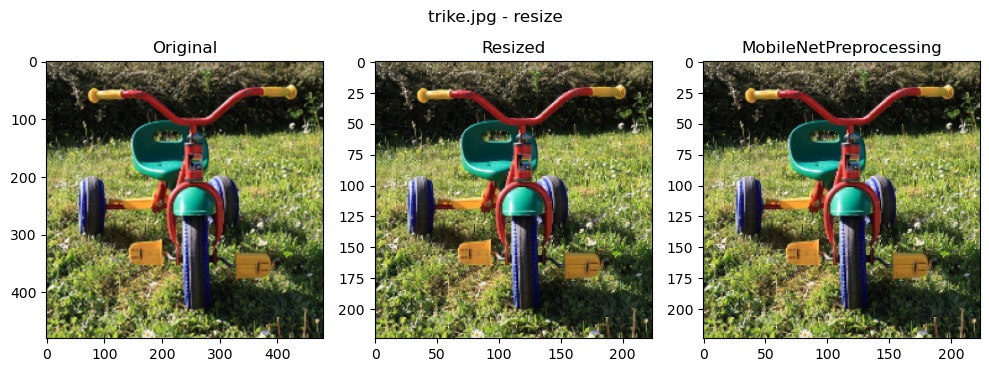

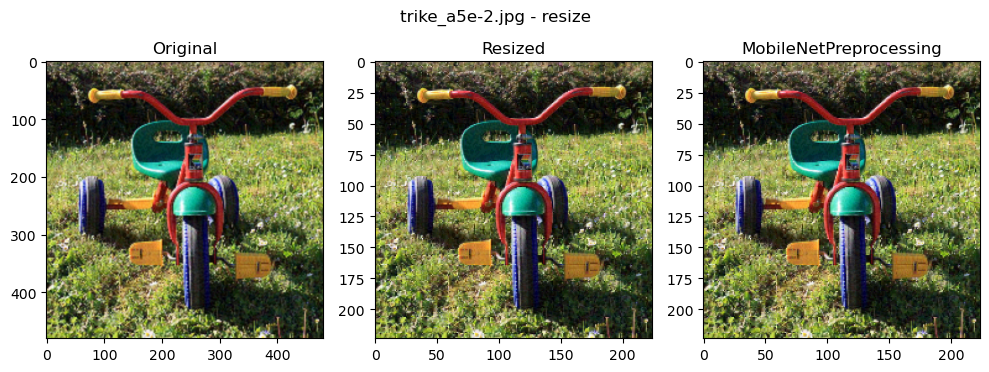

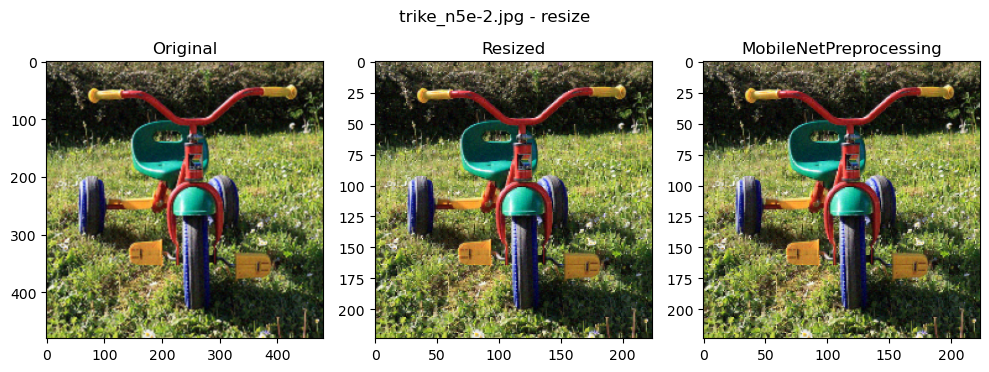

In [7]:
filenames = ['trike.jpg', 'trike_a5e-2.jpg', 'trike_n5e-2.jpg']

outs2 = list()

for filename in filenames:
    # YOUR CODE HERE
    im_tf = jpg_file_to_mobilenet(filename=filename)
    pred = mnv2.predict(im_tf)
    outs2.append(decode_predictions(pred, top=3))
    
print(*outs2, sep='\n')

### Task 2.2

The results of the above experiment should have made you wonder. Therefore, you should take a closer look at the disturbances in the image. Calculate the difference images `di1` by subtracting *trike_a5e-2.jpg* from *trike.jpg* and `di2` by subtracting *trike_n5e-2.jpg* from *trike.jpg*! Use the `jpg_file_to_mobilenet()` once again to read and resize the images before subtracting them (set `show=False` to not repeatedly show all the images).

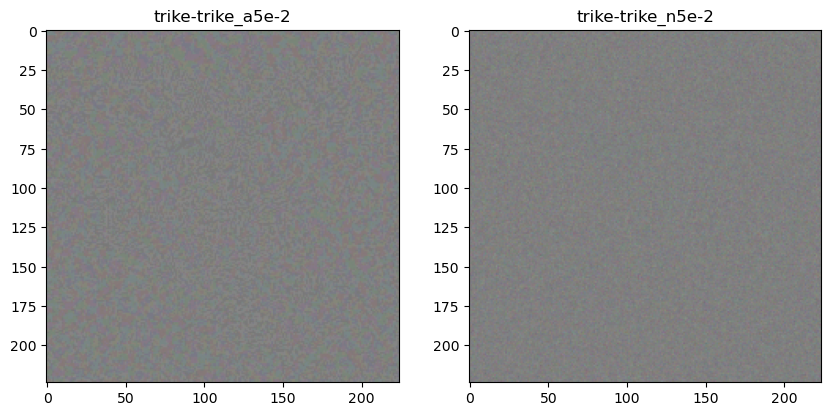

In [8]:
# YOUR CODE HERE
im_trike = jpg_file_to_mobilenet(filename='trike.jpg', show=False)
im_trike_a5e = jpg_file_to_mobilenet(filename='trike_a5e-2.jpg', show=False)
im_trike_n5e = jpg_file_to_mobilenet(filename='trike_n5e-2.jpg', show=False)

di1 = im_trike - im_trike_a5e
di2 = im_trike - im_trike_n5e

fig, axs = plt.subplots(1, 2, figsize=(10,7))
axs[0].imshow(di1[0,:,:,:]*.5+.5)
axs[0].set_title('trike-trike_a5e-2')
axs[1].imshow(di2[0,:,:,:]*.5+.5)
axs[1].set_title('trike-trike_n5e-2')
plt.show()

### Task 2.3

Calculate for both difference images independently the mean for each color channel and store the three values in `m1` and `m2`, respectively. Further, calculate the standard deviation per color channel and store it in `s1` and `s2`. And last but not least the sum of the squares per channel `ssq1` and `ssq2`. 

In [9]:
# YOUR CODE HERE

m1 = np.mean(di1, axis=(1,2))
m2 = np.mean(di2, axis=(1,2))

s1 = np.std(di1, axis=(1,2))
s2 = np.std(di2, axis=(1,2))

ssq1 = np.sum(np.square(di1), axis=(1,2))
ssq2 = np.sum(np.square(di2), axis=(1,2))

print(f"Difference Image 1: \n mean: {m1} \n sd: {s1} \n ssq: {ssq1}")
print('---')
print(f"Difference Image 2: \n mean: {m2} \n sd: {s2} \n ssq: {ssq2}")

Difference Image 1: 
 mean: [[-0.00039362  0.00012825 -0.00036581]] 
 sd: [[0.04156008 0.04028023 0.04233061]] 
 ssq: [[86.67377  81.40566  89.911674]]
---
Difference Image 2: 
 mean: [[-2.9740846e-04 -7.9575721e-06 -7.9589937e-04]] 
 sd: [[0.03723199 0.03720973 0.0373064 ]] 
 ssq: [[69.55872  69.47313  69.865845]]


### Task 2.4* (Bonus)


Which of the following statements is true?

'a': The pertubations in *trike_a5e-2.jpg* and *trike_n5e-2.jpg* are just random noise.

'b': The pertubations in *trike_a5e-2.jpg* are random noise, but the pertubations in *trike_n5e-2.jpg* are depending on *trike.jpg* and the pre-trained *MobileNetV2*.

'c': The pertubations in *trike_a5e-2.jpg* are depending on *trike.jpg* and the pre-trained *MobileNetV2*, but the pertubations in *trike_n5e-2.jpg* are random noise.

'd': The pertubations in *trike_a5e-2.jpg*  and in *trike_n5e-2.jpg* are depending on *trike.jpg* and the pre-trained *MobileNetV2*.

*Use a variable* `x24` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x24='e'`. *There is only one correct answer.*

In [10]:
# YOUR CODE HERE
x24='c'
print('The answer is ' + x24 + '.')

The answer is c.


## Task 3 - Transfer Learning
You want build a convolutional neural network that can predict the house numbers on street view images (http://ufldl.stanford.edu/housenumbers/). 

[<img src="svhn.png" width="700"/>](svhn.png)

Unfortunately, you have only 5000 images for training, and you are afraid this will yield a crappy model. Thus, you decide to use transfer learning, to make the most out of your training data.

As the hardware is limited, we provide you with to already pre-trained models, but you are not sure which one will perform better:
- pre-trained on Cifar10 (https://www.cs.toronto.edu/~kriz/cifar.html)

[<img src="cifar.png" width="700"/>](cifar.png)

- pre-trained on MNIST (http://yann.lecun.com/exdb/mnist/)

[<img src="mnist.png" width="700"/>](mnist.png)

Therefore, you will try both of them.

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import utils, layers, models
import tensorflow_datasets as tfds
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [12]:
# early stopping callback, to stop training once the model isn't improving anymore
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)

# function for plotting model history 
def plot_model_history(history, ax=None, metric='loss', ep_start=1, ep_stop=None,monitor='val_loss', mode='min',plttitle=None):
    if ax is None:
        fig,ax = plt.subplots()
    if ep_stop is None:
        ep_stop = len(history.epoch)
    if plttitle is None:
        plttitle = metric[0].swapcase() + metric[1:]
    ax.plot(np.arange(ep_start,ep_stop+1, dtype='int'),history.history[metric][ep_start-1:ep_stop])
    ax.plot(np.arange(ep_start,ep_stop+1, dtype='int'),history.history['val_' + metric][ep_start-1:ep_stop])
    if metric == 'loss':
        if mode == 'min':
            idx = np.argmin(history.history['val_' + metric][ep_start-1:ep_stop])
        if mode == 'max':
            idx = np.argmax(history.history['val_' + metric][ep_start-1:ep_stop])
        ax.plot(idx+1, history.history['val_' + metric][idx], 'o', color=ax.get_lines()[1].get_color())
    ax.set(title=plttitle)
    ax.set(ylabel=metric[0].swapcase() + metric[1:])
    ax.set(xlabel='Epoch')
    ax.legend(['train', 'val'], loc='upper right')

def plot_cm(y_true, y_pred, classlabels=None,ax=None, xlabel='predicted class',ylabel='actual class',cmtitle='Confusion Matrix'):
    if ax is None:
        fig,ax = plt.subplots()
    conf = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf, annot=True, fmt="d",cmap=sns.color_palette("Blues"),ax=ax)
    if classlabels is not None:
        ax.set(xticklabels=classlabels)
        ax.set(yticklabels=classlabels)
    ax.set(xlabel=xlabel)
    ax.set(ylabel=ylabel)
    ax.set(title=cmtitle)

In [13]:
#load svhn
X_test_svhn, y_test_svhn = tfds.load("svhn_cropped", batch_size=-1, split="test", as_supervised=True)
train_data = np.load('svhn_data.npz')
X_train_svhn = tf.convert_to_tensor(train_data['X_train_svhn'])
y_train_svhn = tf.convert_to_tensor(train_data['y_train_svhn'])

## 3.1 Model pre-trained on Cifar10
We used the following code to train the model:

---

```python
X_train_cifar, y_train_cifar = tfds.load("cifar10", batch_size=-1, split="train", as_supervised=True)

m_save_cifar = ModelCheckpoint('cifar_pretrained.hdf5', save_best_only=True, monitor='val_loss', mode='min')

base_cifar = models.Sequential(
   [
       layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)),
       layers.MaxPooling2D((2, 2)),
       layers.BatchNormalization(),
       layers.Conv2D(64, (3, 3), activation='relu'),
       layers.MaxPooling2D((2, 2)),
       layers.BatchNormalization(),
       layers.Conv2D(64, (3, 3), activation='relu')
   ],
   name = 'base_cifar'
)

head_cifar = models.Sequential(
   [
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
       layers.Dense(10)
   ],
   name = 'head_cifar'
)

model_cifar = models.Sequential(
   [
       base_cifar,
       head_cifar
   ]
)

model_cifar.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_cifar.summary()

history_cifar = model_cifar.fit(X_train_cifar, y_train_cifar, epochs=20, validation_split=0.2, callbacks=[es, m_save_cifar])
```

---


### Task 3.1.1
Load the pre-trained model `cifar_pretrained.hdf5` and store it in the variable `model_cifar`. To check if the model is loaded correctly, evaluate it on the test data `X_test_cifar` and `y_test_cifar`. Store the loss in `test_loss_cifar` and the accuracy in `test_acc_cifar`.

In [14]:
X_test_cifar, y_test_cifar = tfds.load("cifar10", batch_size=-1, split="test", as_supervised=True)

# YOUR CODE HERE
model_cifar = models.load_model('cifar_pretrained.hdf5')
results_31 = model_cifar.evaluate(X_test_cifar, y_test_cifar)
print("test loss, test acc:", results_31)
test_loss_cifar = results_31[0]
test_acc_cifar = results_31[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.9188 - accuracy: 0.7030
test loss, test acc: [0.9187900424003601, 0.703000009059906]


### Task 3.1.2
Now that we have loaded the model pre-trained on cifar data, we can use it for transfer learning. 

For this purpose, we will keep the base `base_cifar`, you can access it from the `model_cifar` using the `get_layer()` method. For transfer learning, we have to freeze its weights, this can be done by settings trainable parameter to `False`. To adopt to the new domain, build a new head `head_svhn_c`. It should have the same architecture as the `head_cifar`. Using `base_cifar` and `head_svhn_c`, build and compile the new model and assign it to the variable `model_svhn_c`.

In the last step, compile the model using the _adam_ optimizer, the _SparseCategoricalCrossentropy_ Loss with the parameter _from_logits_ set to True, and accuracy as metric. 

In [15]:
# YOUR CODE HERE
base_cifar = model_cifar.get_layer('base_cifar')
base_cifar.trainable = False

head_svhn_c = models.Sequential(
   [
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
       layers.Dense(10)
   ],
   name = 'head_svhn_c'
)
#head_svhn_c.trainable = False

model_svhn_c = models.Sequential(
   [
       base_cifar,
       head_svhn_c
   ]
)
model_svhn_c.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model_svhn_c.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base_cifar (Sequential)     (None, 4, 4, 64)          58240     
                                                                 
 head_svhn_c (Sequential)    (None, 10)                66250     
                                                                 
Total params: 124,490
Trainable params: 66,250
Non-trainable params: 58,240
_________________________________________________________________


### Task 3.1.3
Fit the model on `X_train_svhn` and `y_train_svhn` for (max.) 30 epochs. Use a validation split of 0.2 and the early stopping callback `es`. Store the training history in the variable `history_svhn_c`.

After training, evaluate the model on the test data `X_test_svhn` and `y_test_svhn`. Store the loss in `test_loss_svhn_c` and the accuracy in `test_acc_svhn_c`.

Epoch 1/30
125/125 [==============================] - 1s 7ms/step - loss: 1.5812 - accuracy: 0.4780 - val_loss: 1.2089 - val_accuracy: 0.6200
Epoch 2/30
125/125 [==============================] - 1s 7ms/step - loss: 0.9727 - accuracy: 0.6977 - val_loss: 1.0678 - val_accuracy: 0.6560
Epoch 3/30
125/125 [==============================] - 1s 6ms/step - loss: 0.7713 - accuracy: 0.7595 - val_loss: 1.0240 - val_accuracy: 0.6680
Epoch 4/30
125/125 [==============================] - 1s 5ms/step - loss: 0.6357 - accuracy: 0.8095 - val_loss: 0.9512 - val_accuracy: 0.7080
Epoch 5/30
125/125 [==============================] - 1s 5ms/step - loss: 0.5384 - accuracy: 0.8413 - val_loss: 0.9372 - val_accuracy: 0.7180
Epoch 6/30
125/125 [==============================] - 1s 6ms/step - loss: 0.4574 - accuracy: 0.8660 - val_loss: 0.9482 - val_accuracy: 0.7090
Epoch 7/30
125/125 [==============================] - 1s 7ms/step - loss: 0.4084 - accuracy: 0.8840 - val_loss: 0.9297 - val_accuracy: 0.7190
Epoch 

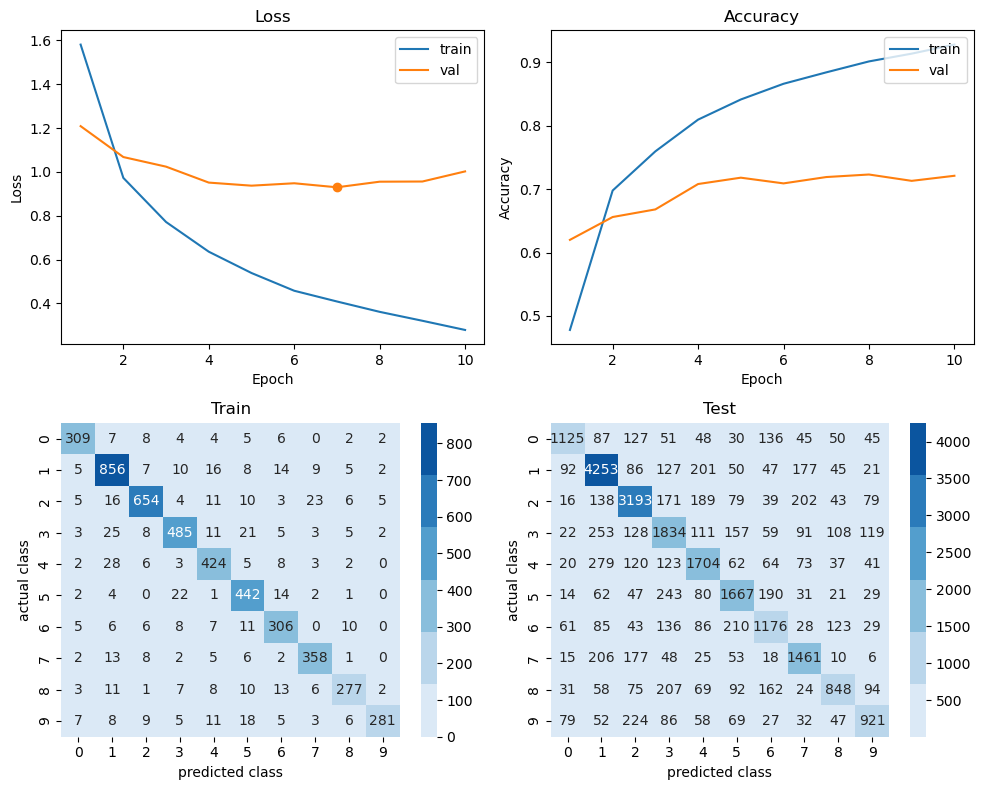

In [16]:
# YOUR CODE HERE
history_svhn_c = model_svhn_c.fit(X_train_svhn, y_train_svhn, epochs=30, validation_split=0.2, callbacks=es)

results_svhn_c = model_svhn_c.evaluate(X_test_svhn, y_test_svhn)
print("test loss, test acc:", results_svhn_c)
test_loss_svhn_c = results_svhn_c[0]
test_acc_svhn_c = results_svhn_c[1]

fig, ax = plt.subplots(2,2,figsize=(10,8))
plot_model_history(history_svhn_c, ax=ax[0,0])
plot_model_history(history_svhn_c, metric='accuracy',ax=ax[0,1])
plot_cm(y_train_svhn, np.argmax(model_svhn_c.predict(X_train_svhn),axis=1), cmtitle='Train', ax=ax[1,0])
plot_cm(y_test_svhn, np.argmax(model_svhn_c.predict(X_test_svhn),axis=1), cmtitle='Test', ax=ax[1,1])
fig.tight_layout()

## 3.2 Model pre-trained on MNIST
We used the following code to train the model:

---

```python
X_train_mnist, y_train_mnist = tfds.load("mnist", batch_size=-1, split="train", as_supervised=True)

m_save_mnist = ModelCheckpoint('mnist_pretrained.hdf5', save_best_only=True, monitor='val_loss', mode='min')

base_mnist = models.Sequential(
   [
       layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
       layers.MaxPooling2D((2, 2)),
       layers.BatchNormalization(),
       layers.Conv2D(64, (3, 3), activation='relu'),
       layers.MaxPooling2D((2, 2)),
       layers.BatchNormalization(),
       layers.Conv2D(64, (3, 3), activation='relu')
   ],
   name='base_mnist'
)

head_mnist = models.Sequential(
   [
       layers.Flatten(),
       layers.Dense(64, activation='relu'),
       layers.Dense(10)
   ],
   name='head_mnist'
)

model_mnist = models.Sequential(
   [
       base_mnist,
       head_mnist
   ]
)

model_mnist.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_mnist.summary()

history_mnist = model_mnist.fit(X_train_mnist, y_train_mnist, epochs=20, validation_split=0.2, callbacks=[es, m_save_mnist])

```

---

### Task 3.2.1
Load the pre-trained model `mnist_pretrained.hdf5` and store it in the variable `model_mnist`. To check if the model is loaded correctly, evaluate it on the test data `X_test_cifar` and `y_test_mnist`. Store the loss in `test_loss_mnist` and the accuracy in `test_acc_mnist`.

In [17]:
X_test_mnist, y_test_mnist = tfds.load("mnist", batch_size=-1, split="test", as_supervised=True)

# YOUR CODE HERE
model_mnist = models.load_model('mnist_pretrained.hdf5')
results_32 = model_mnist.evaluate(X_test_mnist, y_test_mnist)
print("test loss, test acc:", results_32)
test_loss__mnist = results_32[0]
test_acc_mnist = results_32[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.0367 - accuracy: 0.9911
test loss, test acc: [0.0366850309073925, 0.991100013256073]


### Task 3.2.2
Now that we have loaded the model pre-trained on mnist data, we can use it for transfer learning. 

For this purpose, we will keep the base `base_mnist`, you can access it from the `model_mnist` using the `get_layer()` method. For transfer learning, we have to freeze its weights, this can be done by settings trainable parameter to `False`. To adopt to the new domain, build a new head `head_svhn_m`. It should have the same architecture as the `head_mnist`. Using `base_mnist` and `head_svhn_m`, build the new model and assign it to the variable `model_svhn_m`.

In the last step, compile the model using the _adam_ optimizer, the _SparseCategoricalCrossentropy_ Loss with the parameter _from_logits_ set to True, and accuracy as metric. 

In [18]:
# YOUR CODE HERE
base_mnist = model_mnist.get_layer('base_mnist')
base_mnist.trainable = False

head_svhn_m = models.Sequential(
   [
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
       layers.Dense(10)
   ],
   name = 'head_svhn_m'
)
#head_svhn_m.trainable = False

model_svhn_m = models.Sequential(
   [
       base_mnist,
       head_svhn_m
   ]
)
model_svhn_m.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model_svhn_m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base_mnist (Sequential)     (None, 3, 3, 64)          56640     
                                                                 
 head_svhn_m (Sequential)    (None, 10)                37578     
                                                                 
Total params: 94,218
Trainable params: 37,578
Non-trainable params: 56,640
_________________________________________________________________


### Task 3.2.3
In Task 3.1 we could directly use the SVHN data for training our model. This time it might be necessary to apply some pre-processing steps beforehand. Have a look at your data and the model and apply any pre-processing that is necessary. Regardless of which preprocessing you apply, make sure to store the data as `X_train_svhn_pp` and `X_test_svhn_pp`.

In [19]:
# YOUR CODE HERE
print(X_train_svhn.shape)

X_train_svhn_pp = tf.image.resize(X_train_svhn, size=(28,28))
X_test_svhn_pp = tf.image.resize(X_test_svhn, size=(28,28))

print(X_train_svhn_pp.shape)

X_train_svhn_pp = tf.image.rgb_to_grayscale(X_train_svhn_pp)
X_test_svhn_pp = tf.image.rgb_to_grayscale(X_test_svhn_pp)

print(X_train_svhn_pp.shape)

(5000, 32, 32, 3)
(5000, 28, 28, 3)
(5000, 28, 28, 1)


### Task 3.2.4
Fit the model on `X_train_svhn` and `y_train_svhn` for (max.) 30 epochs. Use a validation split of 0.2 and the early stopping callback `es`. Store the training history in the variable `history_svhn_m`.

After training, evaluate the model on the test data `X_test_svhn` and `y_test_svhn`. Store the loss in `test_loss_svhn_m` and the accuracy in `test_acc_svhn_m`.

*HINT: The training data might be not suitable for the network, as mnist and svhn deviate in size and channels. Resizing and transforming to grayscale might be necessary.*

Epoch 1/30
125/125 [==============================] - 1s 6ms/step - loss: 2.2477 - accuracy: 0.2000 - val_loss: 2.0794 - val_accuracy: 0.2670
Epoch 2/30
125/125 [==============================] - 1s 5ms/step - loss: 1.9848 - accuracy: 0.3180 - val_loss: 1.8934 - val_accuracy: 0.3470
Epoch 3/30
125/125 [==============================] - 1s 5ms/step - loss: 1.8334 - accuracy: 0.3805 - val_loss: 1.7376 - val_accuracy: 0.4130
Epoch 4/30
125/125 [==============================] - 1s 5ms/step - loss: 1.7038 - accuracy: 0.4300 - val_loss: 1.7153 - val_accuracy: 0.4140
Epoch 5/30
125/125 [==============================] - 1s 5ms/step - loss: 1.5992 - accuracy: 0.4627 - val_loss: 1.5472 - val_accuracy: 0.4920
Epoch 6/30
125/125 [==============================] - 1s 6ms/step - loss: 1.5406 - accuracy: 0.4848 - val_loss: 1.5585 - val_accuracy: 0.4710
Epoch 7/30
125/125 [==============================] - 1s 5ms/step - loss: 1.4780 - accuracy: 0.5095 - val_loss: 1.4547 - val_accuracy: 0.5350
Epoch 

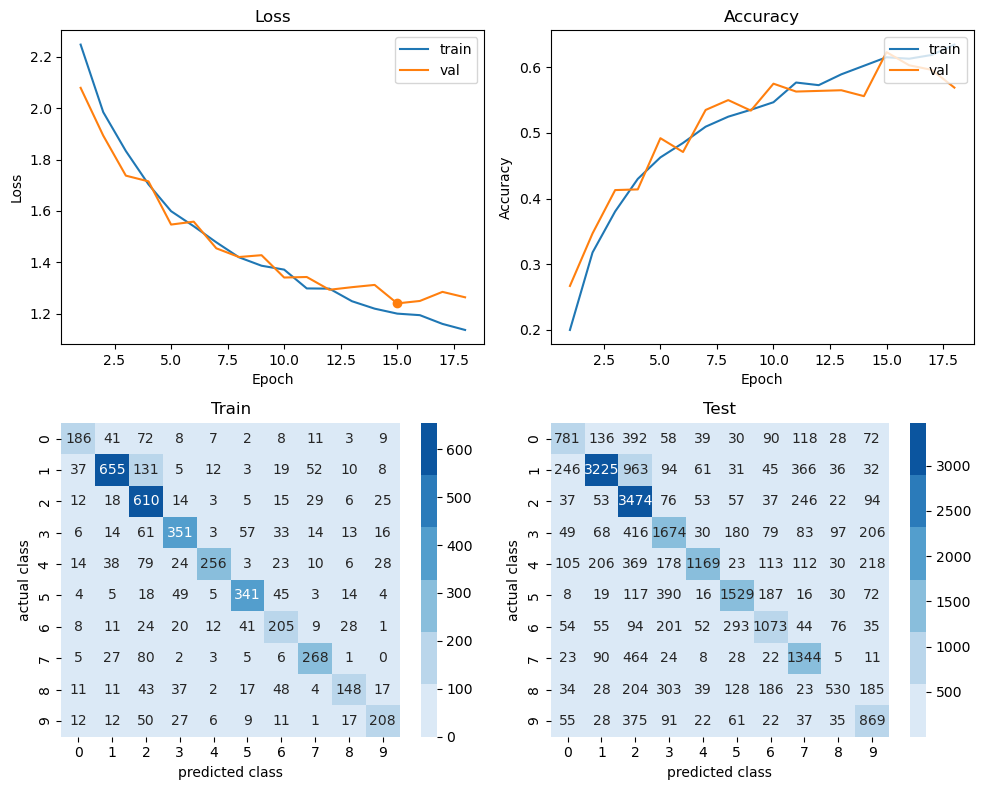

In [20]:
# YOUR CODE HERE
history_svhn_m = model_svhn_m.fit(X_train_svhn_pp, y_train_svhn, epochs=30, validation_split=0.2, callbacks=es)

results_svhn_m = model_svhn_m.evaluate(X_test_svhn_pp, y_test_svhn)
print("test loss, test acc:", results_svhn_m)
test_loss_svhn_m = results_svhn_m[0]
test_acc_svhn_m = results_svhn_m[1]

fig, ax = plt.subplots(2,2,figsize=(10,8))
plot_model_history(history_svhn_m, ax=ax[0,0])
plot_model_history(history_svhn_m, metric='accuracy',ax=ax[0,1])
plot_cm(y_train_svhn, np.argmax(model_svhn_m.predict(X_train_svhn_pp),axis=1), cmtitle='Train', ax=ax[1,0])
plot_cm(y_test_svhn, np.argmax(model_svhn_m.predict(X_test_svhn_pp),axis=1), cmtitle='Test', ax=ax[1,1])
fig.tight_layout()

## 3.3* (Bonus) - From Scratch
You are not that happy about the results yet. To see if transfer learning is of any use at all in this case, you decide to train a complete model from scratch on your svhn data.


### Task 3.3.1* (Bonus)
Build a model with the same architecture as befor. Store the base in `base_svhn`, head in `head_svhn` and the full model in `model_svhn`. 
Finally, compile the model using the _adam_ optimizer, the _SparseCategoricalCrossentropy_ Loss with the parameter _from_logits_ set to True, and accuracy as metric. 

In [21]:
# YOUR CODE HERE
base_svhn = models.Sequential(
   [
       layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)),
       layers.MaxPooling2D((2, 2)),
       layers.BatchNormalization(),
       layers.Conv2D(64, (3, 3), activation='relu'),
       layers.MaxPooling2D((2, 2)),
       layers.BatchNormalization(),
       layers.Conv2D(64, (3, 3), activation='relu')
   ],
   name = 'base_svhn'
)

head_svhn = models.Sequential(
   [
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
       layers.Dense(10)
   ],
   name = 'head_svhn'
)

model_svhn = models.Sequential(
   [
       base_svhn,
       head_svhn
   ]
)

model_svhn.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model_svhn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base_svhn (Sequential)      (None, 4, 4, 64)          58240     
                                                                 
 head_svhn (Sequential)      (None, 10)                66250     
                                                                 
Total params: 124,490
Trainable params: 124,298
Non-trainable params: 192
_________________________________________________________________


### Task 3.3.2* (Bonus)
Fit the model on `X_train_svhn` and `y_train_svhn` for 30 epochs. Use a validation split of 0.2 and the early stopping callback `es`. Store the training history in the variable `history_svhn`.

After training, evaluate the model on the test data `X_test_svhn` and `y_test_svhn`. Store the loss in `test_loss_svhn` and the accuracy in `test_acc_svhn`.

Epoch 1/30
125/125 [==============================] - 3s 17ms/step - loss: 1.5954 - accuracy: 0.4640 - val_loss: 1.3401 - val_accuracy: 0.5880
Epoch 2/30
125/125 [==============================] - 2s 15ms/step - loss: 0.7225 - accuracy: 0.7765 - val_loss: 0.9084 - val_accuracy: 0.7090
Epoch 3/30
125/125 [==============================] - 2s 15ms/step - loss: 0.4857 - accuracy: 0.8493 - val_loss: 0.7090 - val_accuracy: 0.7770
Epoch 4/30
125/125 [==============================] - 2s 16ms/step - loss: 0.3963 - accuracy: 0.8755 - val_loss: 0.7855 - val_accuracy: 0.7550
Epoch 5/30
125/125 [==============================] - 2s 15ms/step - loss: 0.2940 - accuracy: 0.9060 - val_loss: 0.7065 - val_accuracy: 0.7900
Epoch 6/30
125/125 [==============================] - 2s 15ms/step - loss: 0.2216 - accuracy: 0.9315 - val_loss: 0.7322 - val_accuracy: 0.8030
Epoch 7/30
125/125 [==============================] - 2s 15ms/step - loss: 0.1860 - accuracy: 0.9440 - val_loss: 0.7470 - val_accuracy: 0.7700

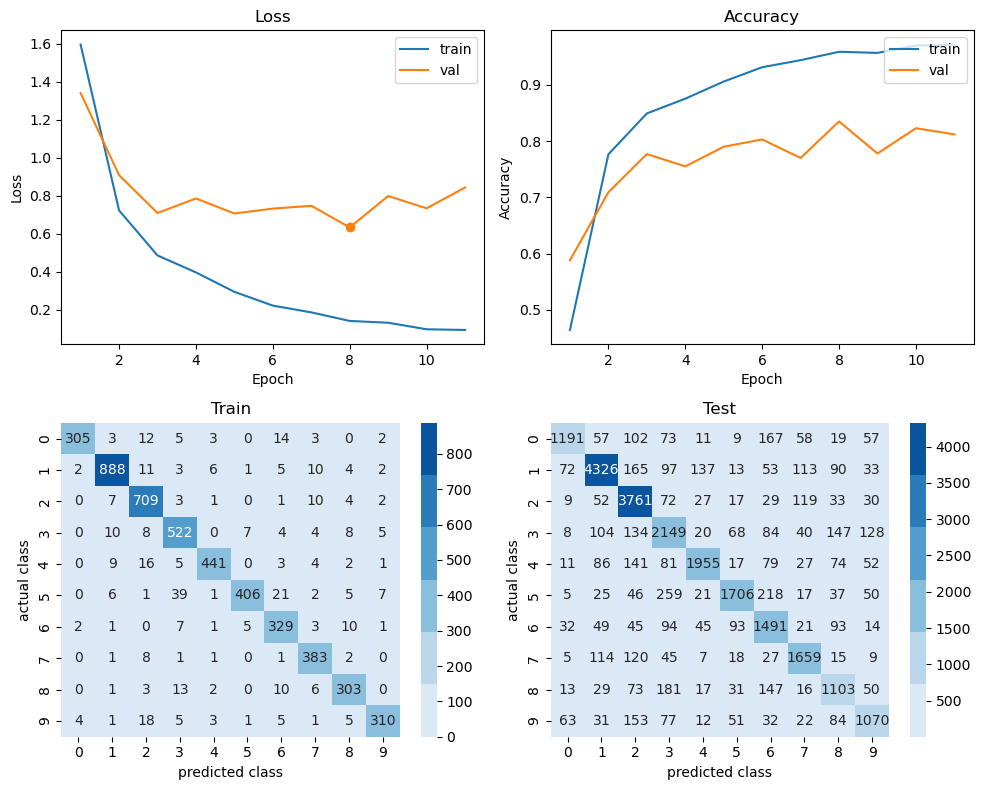

In [22]:
# YOUR CODE HERE
history_svhn = model_svhn.fit(X_train_svhn, y_train_svhn, epochs=30, validation_split=0.2, callbacks=es)

results_svhn = model_svhn.evaluate(X_test_svhn, y_test_svhn)
print("test loss, test acc:", results_svhn)
test_loss_svhn = results_svhn[0]
test_acc_svhn = results_svhn[1]

fig, ax = plt.subplots(2,2,figsize=(10,8))
plot_model_history(history_svhn, ax=ax[0,0])
plot_model_history(history_svhn, metric='accuracy',ax=ax[0,1])
plot_cm(y_train_svhn, np.argmax(model_svhn.predict(X_train_svhn),axis=1), cmtitle='Train', ax=ax[1,0])
plot_cm(y_test_svhn, np.argmax(model_svhn.predict(X_test_svhn),axis=1), cmtitle='Test', ax=ax[1,1])
fig.tight_layout()

### Task 3.4* (Bonus)
After tons of hard work labelling house numbers you get a model which is trained from scratch on the whole SVHN training set. Load the pre-trained model `svhn_pretrained.hdf5` and store it in the variable `model_svhn_all`. Evaluate it on the test data `X_test_svhn` and `y_test_svhn`. Store the loss in `test_loss_svhn_all` and the accuracy in `test_acc_svhn_all`.

313/313 [==============================] - 1s 4ms/step - loss: 4.5724 - accuracy: 0.0900
test loss, test acc: [4.572376728057861, 0.09000000357627869]
814/814 [==============================] - 3s 4ms/step


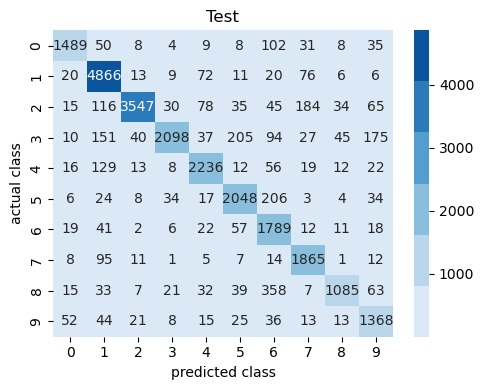

In [23]:
# YOUR CODE HERE
model_svhn_all = models.load_model('svhn_pretrained.hdf5')
results_svhn_all = model_svhn_all.evaluate(X_test_cifar, y_test_cifar)
print("test loss, test acc:", results_svhn_all)
test_loss_svhn_all = results_svhn_all[0]
test_acc_svhn_all = results_svhn_all[1]

fig, ax = plt.subplots(1,1,figsize=(5,4))
plot_cm(y_test_svhn, np.argmax(model_svhn_all.predict(X_test_svhn),axis=1), cmtitle='Test', ax=ax)
fig.tight_layout()